<a href="https://colab.research.google.com/github/KathyOchoa/DATA-201-STAT-Methods-in-DS-Projects/blob/main/Data201_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Final Project - Cardiovascular disease
### By: Lulua Shahmalak and Katherine Ochoa


### **Introduction**

We accessed the cardiovascular disease dataset from the kaggle website. Three aspects of a patient's health were used to acquire this data. information that is factual, the findings of their medical testing, and information provided by the patient. Age, blood pressure, alcohol use, and other features of the patient's life are included to examine the relatioship between the variables and the development of cardiovascular disease.


Our goal in this project is to determine whether physical exercise affects the occurrence of cardiovascular disease.


Reference: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

The dataset is a csv containing 70,000 records of patients data with 13 colums:

- Age - days
- Height - int (cm)
- Weight - float (kg)
- Gender - catagorical variable (1: women, 2: men)
- Systolic blood pressure - int
- Diastolic blood pressure - int
- Cholesterol - 1: normal, 2: above normal, 3: well above normal
- Glucose - 1: normal, 2: above normal, 3: well above normal
- Smoking - binary
- Alcohol intake - binary
- Physical activity - binary
- Presence or absence of cardiovascular disease - binary

All of the dataset values were collected at the moment of medical examination.

### **Prepare and wrangle the data**

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-1-41fc0200991d>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Read the CSV file into a data frame variable
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv',  sep=';')

Mounted at /content/drive


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
# Create a new variable, BMI (weight/height) and store it as new data variable
df['BMI'] = (df['weight']/(df['height']/100)**2).astype('float')

# Create a new variable, pulsePres (ap_hi - ap_lo) and store it as new data variable
df['pulsePres'] = ((df['ap_hi']) - (df['ap_lo'])).astype('int')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulsePres
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  BMI          70000 non-null  float64
 14  pulsePres    70000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 8.0 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulsePres
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513,32.186871
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511,241.469638
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,-10800.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,40.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068,40.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222,50.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,15940.000000


In [8]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

There seems to be double the amount of females than males in this dataset.



In [9]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [10]:
# Look at rows where the pulse pressure is less than 0
df[['ap_hi', 'ap_lo', 'pulsePres']].loc[df['pulsePres'] <= 0]

,ap_hi,ap_lo,pulsePres
228,160,1100,-940
241,160,1000,-840
260,140,800,-660
329,160,1000,-840
345,140,1000,-860
...,...,...,...
69771,160,1000,-840
69872,160,1000,-840
69878,160,1000,-840
69885,170,1000,-830


In [11]:
# Drop observatios where pulse pressure is less than 0 and greater than 300
df2 = df.loc[(df['pulsePres'] > 0) & (df['pulsePres'] < 300)]
df2['pulsePres'].describe()

count    68724.000000
mean        45.412025
std         11.818149
min          4.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        160.000000
Name: pulsePres, dtype: float64

In [12]:
# Group patients with cardiovascular disease
hasCVD = df2.groupby('cardio').get_group(1)
hasCVD.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulsePres
count,33997.000000,33997.000000,33997.00000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.000000,33997.0,33997.000000,33997.000000
mean,50084.235227,20061.524193,1.35206,164.272465,76.719558,133.884666,84.505574,1.516604,1.277377,0.083272,0.051387,0.788393,1.0,28.525929,49.379092
std,28820.577502,2316.057900,0.47762,8.243744,14.880123,17.325104,9.793296,0.776612,0.624544,0.276297,0.220789,0.408454,0.0,6.350798,12.870099
min,1.000000,14275.000000,1.00000,55.000000,11.000000,15.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,3.471784,4.000000
25%,25262.000000,18389.000000,1.00000,159.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,24.464602,40.000000
50%,50138.000000,20388.000000,1.00000,165.000000,75.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,27.434842,50.000000
75%,74988.000000,21902.000000,2.00000,170.000000,85.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.0,31.511502,60.000000
max,99998.000000,23713.000000,2.00000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.0,298.666667,160.000000


In [13]:
# Group patients without cardiovascular disease
noCVD = df2.groupby('cardio').get_group(0) # does not have CVD
noCVD.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulsePres
count,34727.000000,34727.000000,34727.000000,34727.000000,34727.000000,34727.000000,34727.000000,34727.000000,34727.000000,34727.000000,34727.00000,34727.000000,34727.0,34727.000000,34727.000000
mean,49868.616235,18879.664526,1.345293,164.444956,71.567993,119.598756,78.070406,1.215884,1.174936,0.092493,0.05526,0.818095,0.0,26.540338,41.528350
std,28866.736738,2472.659540,0.475471,8.138375,13.287971,12.597229,8.380733,0.526292,0.509153,0.289725,0.22849,0.385771,0.0,5.606708,9.151898
min,0.000000,10798.000000,1.000000,59.000000,22.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.0,7.022248,5.000000
25%,24733.000000,16839.000000,1.000000,159.000000,63.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.0,23.388687,40.000000
50%,49875.000000,19005.000000,1.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.0,25.475211,40.000000
75%,74732.500000,20872.000000,2.000000,170.000000,79.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.0,28.763971,40.000000
max,99999.000000,23678.000000,2.000000,207.000000,200.000000,240.000000,160.000000,3.000000,3.000000,1.000000,1.00000,1.000000,0.0,237.768633,160.000000


### **EDA Principles**

<ipython-input-14-df167f80cb2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age(years)'] = (df2['age']/365). round().astype('int')


<Axes: xlabel='age(years)', ylabel='count'>

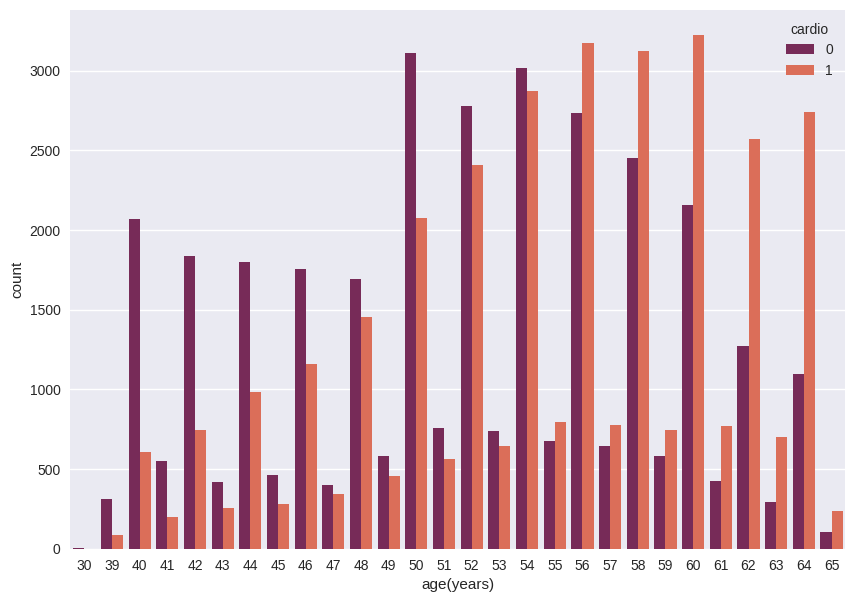

In [14]:
# Create a new variable, age(years), that changes age from days to years
df2['age(years)'] = (df2['age']/365). round().astype('int')

f, axes = plt.subplots(1, 1, figsize=(10, 7))
sns.countplot(x='age(years)', hue='cardio', data = df2, palette="rocket")

We can see that individuals over the age of 55 are unquestionably more at risk for developing CVD.


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

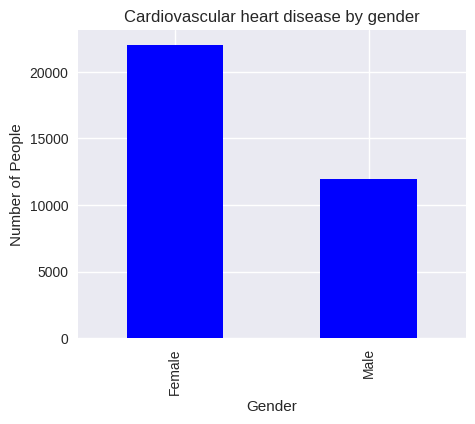

In [15]:
#Distribution of cardiovascular heart disease by gender
gender = hasCVD['gender'].value_counts()
plt.figure(figsize=(5, 4))
ax = gender.plot(kind='bar', color="b")
ax.set_title("Cardiovascular heart disease by gender")
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Female', 'Male'))

According to this data set, females seem to be more likely to have cardiovascular disease compared to males

<Axes: xlabel='age(years)', ylabel='BMI'>

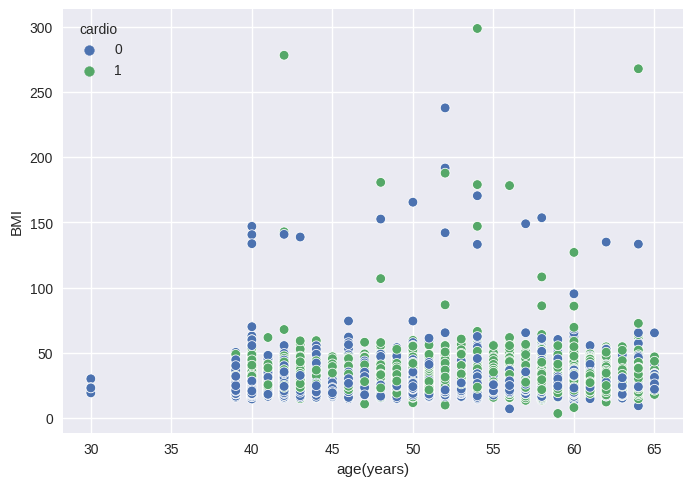

In [16]:
sns.scatterplot(data = df2, x = 'age(years)', y = 'BMI', hue = 'cardio')

<Axes: xlabel='age(years)', ylabel='pulsePres'>

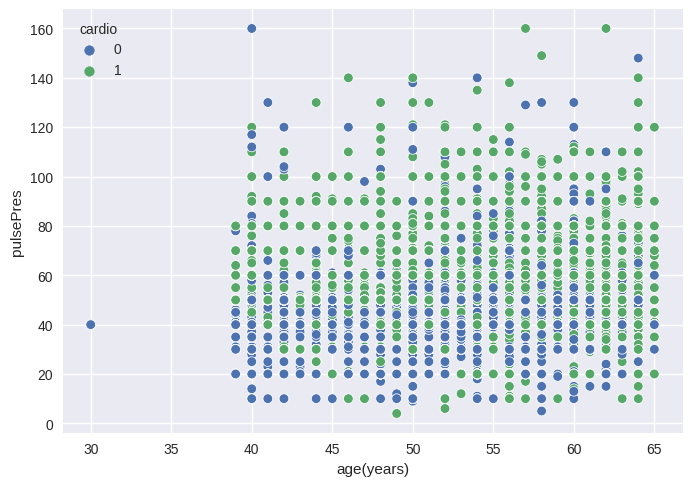

In [17]:
sns.scatterplot(data = df2, x = 'age(years)', y = 'pulsePres', hue = 'cardio')

### **Scikit-learn KMeans**

In [18]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df2[['BMI','age(years)']], df2[['pulsePres']], test_size=0.33,random_state=0)

In [19]:
# Normalize the training and test data using the preprocessing.normalize() method
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [20]:
# Create an instance of KMeans, define the number of clusters using the n_clusters attribute (K=5)
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='age(years)', ylabel='BMI'>

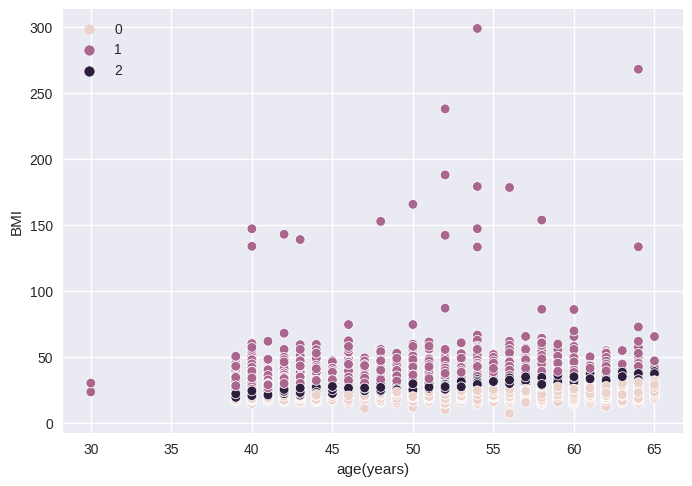

In [21]:
sns.scatterplot(data = X_train, x = 'age(years)', y = 'BMI', hue = kmeans.labels_)

 ### **Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

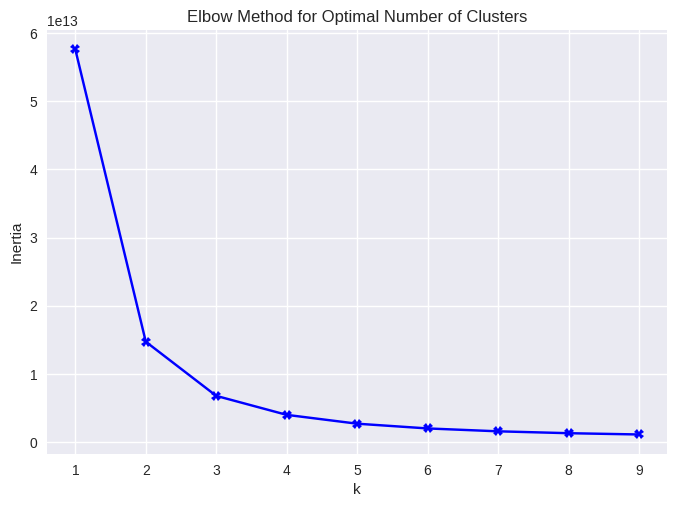

In [22]:
inertias = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    inertias.append(km.inertia_)

plt.plot(K, inertias, 'bX-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Since the elbow is at 3, minimization of dispersion is optimal when the K-means algorithm yields using 3 clusters.

### **Check clusters**

In [23]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df2[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI', 'pulsePres', 'age(years)']])
df2['kmeans_3'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-2317381be456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kmeans_3'] = kmeans.labels_


In [24]:
df2['kmeans_3'].value_counts()

1    32195
2    24856
0    11673
Name: kmeans_3, dtype: int64

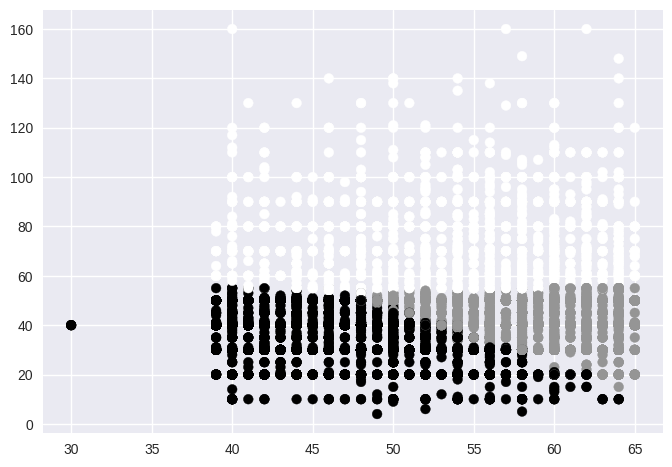

In [25]:
plt.scatter(x=df2['age(years)'], y= df2['pulsePres'], c = df2['kmeans_3'])
plt.show()